In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv('train.csv')
data.shape

(42000, 785)

In [3]:
# Assuming your data is in a pandas DataFrame 'data' with pixel values and labels
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Reshape to (samples, 28, 28, 1)
y = to_categorical(data.iloc[:, 0].values)          # Convert labels to one-hot encoding

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6923 - loss: 2.7154 - val_accuracy: 0.9676 - val_loss: 0.1101
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9455 - loss: 0.1940 - val_accuracy: 0.9788 - val_loss: 0.0734
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9629 - loss: 0.1237 - val_accuracy: 0.9801 - val_loss: 0.0717
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9680 - loss: 0.1061 - val_accuracy: 0.9811 - val_loss: 0.0633
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9711 - loss: 0.0932 - val_accuracy: 0.9843 - val_loss: 0.0506
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9775 - loss: 0.0829 - val_accuracy: 0.9826 - val_loss: 0.0658
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9772 - loss: 0.0775 - val_accuracy: 0.9826 - val_loss: 0.0595
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9815 - loss: 0.0641 - 

In [8]:
# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9844 - val_loss: 0.0674
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9872 - loss: 0.0458 - val_accuracy: 0.9864 - val_loss: 0.0551
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9869 - loss: 0.0433 - val_accuracy: 0.9849 - val_loss: 0.0657
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0537 - val_accuracy: 0.9870 - val_loss: 0.0547
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.9864 - val_loss: 0.0579
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.9876 - val_loss: 0.0562
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9868 - val_loss: 0.0588
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9891 - loss: 0.0346 - 

In [9]:
# Check available keys in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9859 - loss: 0.0788
Test accuracy: 0.9860


KeyError: 'accuracy'

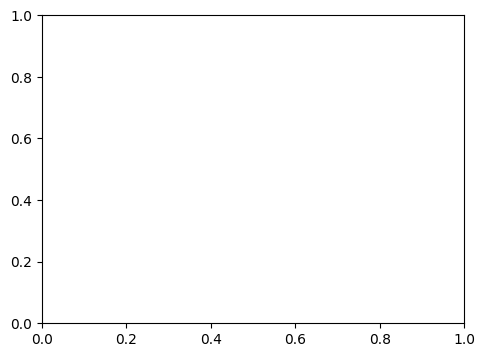

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

KeyError: 'loss'

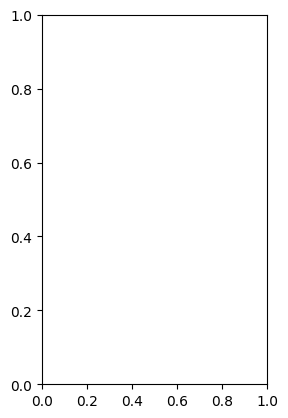

In [12]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

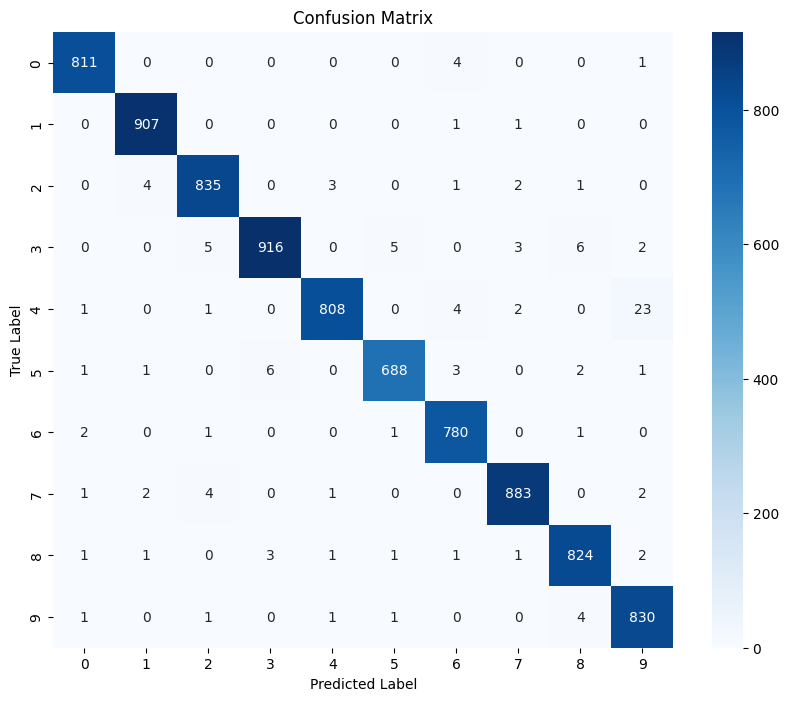

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()